In [1]:
%tensorflow_version 2.x
import tensorflow as tf 
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

# **Loading Dataset**

In [2]:
(train_features, train_labels), (test_features, test_labels) = keras.datasets.mnist.load_data(path="mnist.npz")

# **Visualizing Data**

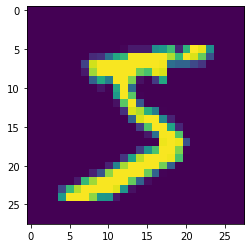

In [3]:
plt.figure()
plt.imshow(train_features[0])
plt.show()

In [4]:
print(train_features.shape, train_labels.shape, test_features.shape, test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


# **Data Preprocessing**

In [5]:
train_features, test_features = train_features / 255.0, test_features / 255.0

# **Designing the Neural Network Architecture**

In [6]:
model = keras.Sequential([
              keras.layers.Flatten(input_shape = (28, 28)),
              keras.layers.Dense(128, activation = "relu"),
              keras.layers.Dense(64, activation = "relu"),
              keras.layers.Dense(10, activation = "softmax"),
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


# **Compiling the Model**

In [8]:
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

# **Training and Evaluating the Model**

In [9]:
model.fit(train_features, train_labels, validation_data = (test_features, test_labels), epochs = 4)

Epoch 1/4
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2318 - accuracy: 0.9324 - val_loss: 0.1332 - val_accuracy: 0.9563
Epoch 2/4
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0996 - accuracy: 0.9699 - val_loss: 0.0950 - val_accuracy: 0.9706
Epoch 3/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0697 - accuracy: 0.9786 - val_loss: 0.0860 - val_accuracy: 0.9733
Epoch 4/4
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0519 - accuracy: 0.9834 - val_loss: 0.0739 - val_accuracy: 0.9779


In [10]:
test_loss, test_acc = model.evaluate(test_features, test_labels)
print("Test Accuracy:", test_acc)

313/313 [==============================] - 0s 2ms/step - loss: 0.0739 - accuracy: 0.9779
Test Accuracy: 0.9779000282287598


In [12]:
def check(num):
  print("Predicted class:", np.argmax(model.predict(test_features)[num]))
  print("Actual class:", test_labels[num])
  plt.figure()
  plt.imshow(test_features[num])
  plt.show()

Predicted class: 3
Actual class: 3


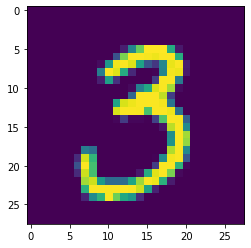

In [13]:
check(90)